In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "/home/rudra/Documents/state_space_analysis/axej_eeg/subj1/Raw/AxeJEEG_Subj01_S1_Run1.mat.mat"

keys = [ "exptName", "subName", "sessionNum", "runNum", "rndSeed", "EEG", "ori", "alloriTag", "tgCoh", "attCue", "cueColor", "tgColor", "expOri", "unexpOri", "stimDir", "stimDirReal", "stimDirREAL", "tnumb", "fdur", "joyx", "joyy", "f_precuedur", "f_cuedur", "f_tgdur", "f_nontgdur", "f_ITIdur", "stimonset", "cueonset", "SCI", "tgonset", "CTI", "tgoffset", "tgDur", "stimoffset", "stimDur", "ITI",]

In [3]:
#enumeate the keys and show
for i, key in enumerate(keys):
    print(i, key)

0 exptName
1 subName
2 sessionNum
3 runNum
4 rndSeed
5 EEG
6 ori
7 alloriTag
8 tgCoh
9 attCue
10 cueColor
11 tgColor
12 expOri
13 unexpOri
14 stimDir
15 stimDirReal
16 stimDirREAL
17 tnumb
18 fdur
19 joyx
20 joyy
21 f_precuedur
22 f_cuedur
23 f_tgdur
24 f_nontgdur
25 f_ITIdur
26 stimonset
27 cueonset
28 SCI
29 tgonset
30 CTI
31 tgoffset
32 tgDur
33 stimoffset
34 stimDur
35 ITI


In [4]:
mat_contents = sio.loadmat(path)
raw_data = mat_contents["p"][0][0]
data = {key: raw_data[i] for i, key in enumerate(keys)}

In [5]:
data["joyx"].shape, data["joyx"].shape, data["cueColor"].shape

((120, 500), (120, 500), (120, 1))

In [6]:
data["subName"]

array(['01'], dtype='<U2')

In [7]:
# Scatter plot each point in the 500 points instead.
# Change the color of the points based on the step
def plot_path(trial):
    plt.scatter(data["joyx"][trial], data["joyy"][trial], c=range(500))
    plt.xlim(-1.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.colorbar()
    plt.show()


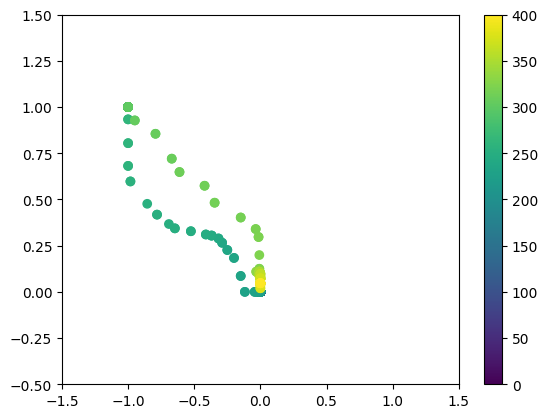

In [8]:
plot_path(0)

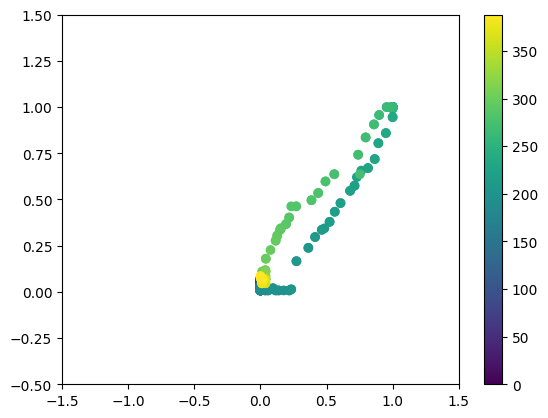

In [9]:
plot_path(100)

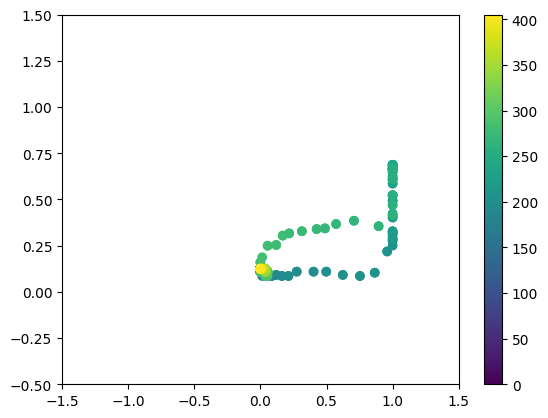

In [10]:
plot_path(30)

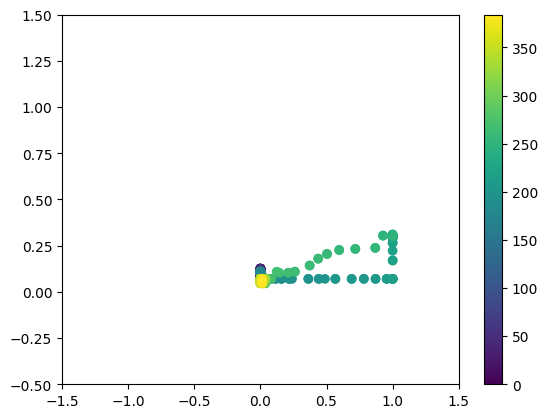

In [11]:
plot_path(119)

(-0.5, 1.5)

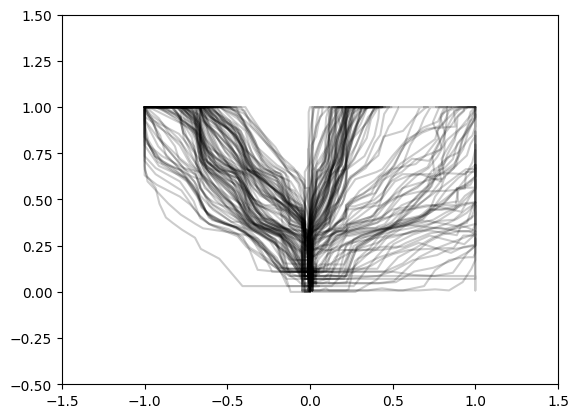

In [12]:
for i in range(120):
    trial = i
    plt.plot(data["joyx"][trial], data["joyy"][trial], c="k", alpha=0.2)

plt.xlim(-1.5, 1.5)
plt.ylim(-0.5, 1.5)

In [13]:
# print all data keys and values
for key, value in data.items():
    print(key, value.shape)

exptName (1,)
subName (1,)
sessionNum (1, 1)
runNum (1, 1)
rndSeed (1, 1)
EEG (1, 1)
ori (1, 5)
alloriTag (1, 5)
tgCoh (120, 1)
attCue (120, 1)
cueColor (120, 1)
tgColor (120, 1)
expOri (1, 1)
unexpOri (1, 4)
stimDir (120, 1)
stimDirReal (1, 120)
stimDirREAL (1, 120)
tnumb (1, 1)
fdur (120, 500)
joyx (120, 500)
joyy (120, 500)
f_precuedur (1, 120)
f_cuedur (1, 120)
f_tgdur (120, 1)
f_nontgdur (120, 1)
f_ITIdur (1, 120)
stimonset (120, 1)
cueonset (120, 1)
SCI (120, 1)
tgonset (120, 1)
CTI (120, 1)
tgoffset (120, 1)
tgDur (120, 1)
stimoffset (120, 1)
stimDur (120, 1)
ITI (120, 1)


In [14]:
dist_from_cent = np.sqrt(data["joyx"] ** 2 + data["joyy"] ** 2)
dist_from_cent.shape

(120, 500)

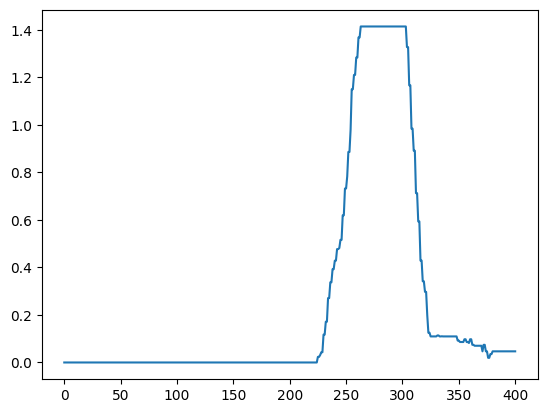

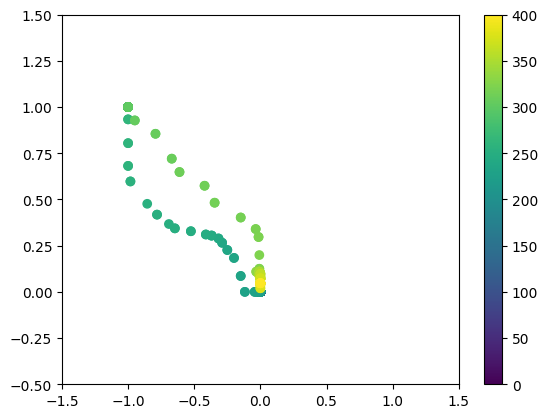

In [15]:
# plot the distance graph
plt.plot(dist_from_cent[0])
plt.show()
plot_path(0)

In [16]:
# replace nan with 0
# for each of those 120 lines, get the index at max of those lines
# and then get the x and y coordinate at that index
# and then plot that
dist_from_cent[np.isnan(dist_from_cent)] = 0
max_idx = np.argmax(dist_from_cent, axis=1)
max_idx

array([263, 241, 177, 262, 210, 219, 218, 230, 209, 208, 213, 233, 243,
       196, 228, 230, 189, 238, 236, 244, 174, 183, 214, 192, 180, 254,
       183, 175, 197, 297, 235, 192, 165, 186, 210, 157, 136, 230, 233,
       206, 233, 221, 239, 229, 209, 237, 192, 214, 208, 257, 240, 197,
       169, 161, 165, 193, 176, 204, 249, 198, 198, 166, 184, 175, 195,
       220, 146, 235, 214, 243, 270, 252, 294, 236, 239, 185, 263, 265,
       256, 199, 207, 173, 210, 223, 168, 193, 220, 219, 241, 162, 226,
       227, 251, 262, 244, 181, 202, 183, 193, 263, 237, 223, 177, 208,
       184, 174, 200, 118, 142, 231, 249, 229, 189, 184, 211, 195, 217,
       225, 231, 234])

In [17]:
# get the x, y at max distance
# Plot a line to the max distance from center
# get the angle from the horizontal counterclocwise

def plot_resp(trial):
    max_x, max_y = data["joyx"][trial][max_idx[trial]], data["joyy"][trial][max_idx[trial]]
    plt.scatter(data["joyx"][trial], data["joyy"][trial], c=range(500))
    plt.plot([0, max_x], [0, max_y], c="k")
    plt.xlim(-1.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.colorbar()

    resp_angle = np.arctan2(max_y, max_x)
    resp_angle = np.rad2deg(resp_angle)
    resp_angle

    # add the degree to top right corner
    plt.text(1, 1.4, f"{resp_angle:.2f}")
    plt.show()

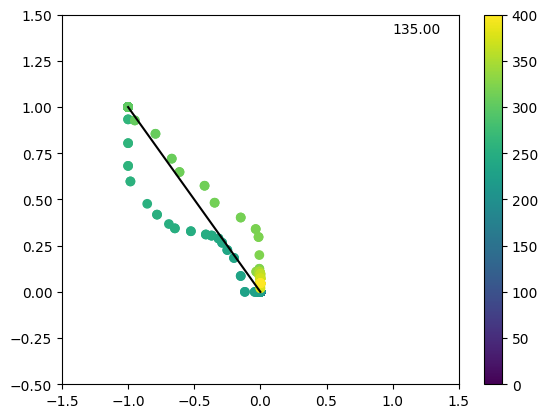

In [18]:
plot_resp(0)

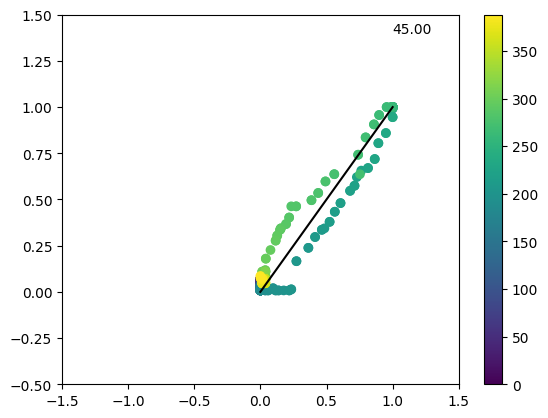

In [19]:
plot_resp(100)

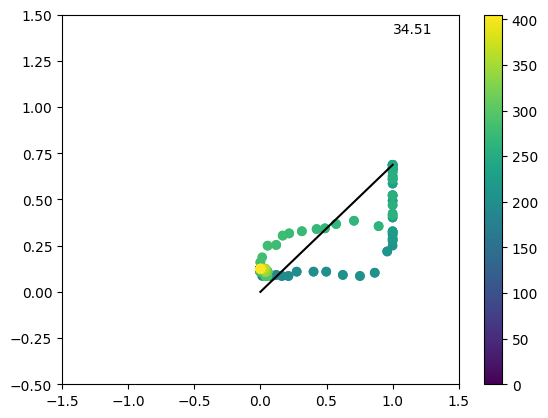

In [20]:
plot_resp(30)

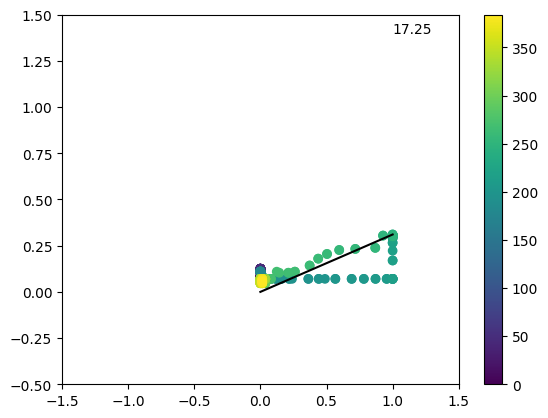

In [21]:
plot_resp(119)

In [22]:
# get response angle for all trials at max distance
resp_angle = [np.arctan2(data["joyy"][i, max_idx[i]], data["joyx"][i, max_idx[i]]) for i in range(120)]
resp_angle = np.rad2deg(resp_angle)
resp_angle.shape

(120,)

In [23]:
resp_angle

array([135.        , 135.        , 135.        , 135.        ,
       135.        , 135.        , 131.44128431,  25.11718356,
        69.76611351, 132.18601622, 135.        ,  37.44128061,
        54.5605419 ,  79.01547661,  83.4002232 ,  83.4002232 ,
       135.        ,  76.86235525,  71.768117  , 128.00051138,
        64.52220035,  16.12458166,  73.50597842, 135.        ,
        70.65892669,  38.55134136, 135.        ,  66.38024115,
       128.00051138, 135.        ,  34.50852299,  72.68252145,
        76.86235525, 131.62749308,  20.1632351 ,  79.01547661,
        34.50852299, 128.00051138,  33.82208522, 135.        ,
        79.01547661, 135.22432727, 135.        ,  62.01382334,
        67.52512033,  75.59227932, 135.        , 132.67295923,
        66.38024115, 135.        ,  67.52512033, 128.00051138,
        67.23707879, 135.        ,  70.35851752,  68.39148155,
       135.        , 135.        , 133.86066249, 135.        ,
       135.        ,  67.52512033, 135.        ,  66.38

In [24]:
data["stimDir"].flatten()

array([1, 2, 4, 1, 5, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 3, 1, 3, 1, 1, 2, 3, 1, 1, 1, 4, 1, 1, 2, 5, 3, 1, 1, 4, 2,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 3, 5, 1, 1, 4, 5, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 5, 3, 1, 3,
       5, 2, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3], dtype=uint8)

In [25]:
data["stimDirReal"].flatten()

array([ 21,  57, 129,  21, 165,  21,  21,  21, 129,  21,  21,  21,  21,
        21,  57,  21,  21,  21, 129,  21,  21,  21,  21,  21,  93,  21,
        93,  21,  21,  57,  93,  21,  21,  21, 129,  21,  21,  57, 165,
        93,  21,  21, 129,  57,  21,  21,  21,  21,  21,  21,  21, 129,
        21,  21,  21,  21,  21,  93, 165,  21,  21, 129, 165,  21,  21,
        21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,
        21,  57,  21, 129,  21,  21, 165,  93,  21,  93, 165,  57,  21,
        21,  21,  21,  21,  21, 165,  21,  21,  21,  21,  21,  21,  21,
        21,  21,  21,  21,  57, 165,  21,  21,  21,  21,  21,  21,  21,
        21,  21,  93], dtype=uint8)

In [26]:
data["stimDirREAL"].flatten()

array([159, 123,  51, 159,  15, 159, 159, 159,  51, 159, 159, 159, 159,
       159, 123, 159, 159, 159,  51, 159, 159, 159, 159, 159,  87, 159,
        87, 159, 159, 123,  87, 159, 159, 159,  51, 159, 159, 123,  15,
        87, 159, 159,  51, 123, 159, 159, 159, 159, 159, 159, 159,  51,
       159, 159, 159, 159, 159,  87,  15, 159, 159,  51,  15, 159, 159,
       159, 159, 159, 159, 159, 159, 159, 159, 159, 159, 159, 159, 159,
       159, 123, 159,  51, 159, 159,  15,  87, 159,  87,  15, 123, 159,
       159, 159, 159, 159, 159,  15, 159, 159, 159, 159, 159, 159, 159,
       159, 159, 159, 159, 123,  15, 159, 159, 159, 159, 159, 159, 159,
       159, 159,  87], dtype=uint8)

#### One of 5 possible orientation (15-159° with 36° increments) [ 15, 51, 87, 123, 159 ]

In [27]:
np.unique(data["stimDirREAL"].flatten(), return_counts=True)

(array([ 15,  51,  87, 123, 159], dtype=uint8), array([ 8,  8,  8,  8, 88]))